In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

from numba import njit
from numpy.linalg import eig as eig

## Домашнее задание

__Упражнение 1 -  Numpy__
1. Пусть у двух матриц совпадает количество строк. Объедините их в одну горизонтально (объедините столбцы этих матриц)

2. Пусть дана пuтру-матрица $M$ и два массива индексов $a, b$ одинаковой длины. Постройте массив элементов $M[a[0], b[0]], M[a[1], b[1]], \ldots$ Указание: для выполнения этой операции не требуется никаких именных функций.

3. Подсчитайте след матрицы и количество ненулевых элементов на ее диагонали

4. Даны два произвольных numpy-массива одинаковой размерности $(n, m)$. Замените нулями те элементы второго массива, для которых на соответствующем месте в первом массиве находятся отрицательные числа

5. Даны две матрицы с одинаковым количеством строк и количеством столбцов $n$ и $m$ соответственно. Постройте матрицу $n \times m$ всевозможных произведений столбцов друг на друга (в смысле скалярного произведения).

__Упражнение 2 -  Matplotlib__
1. Постройте таблицу $2 \times 2$ из четырех графиков (см. функцию plt.subplots)
   
2. Постройте график с крестами ошибок

3. Постройте график в логарифмическом масштабе без явного вычисления логарифмов

__Упражнение 3 -  Погрешности__

1. Оценить погрешность в определении корней уравнения $a y^3+d=0$, если величины $a=1$ и $d=8$ заданы с точностью $\Delta(a)=10^{-3}$ и $\Delta(d)=10^{-3}$.

2. Определить оптимальный шаг численного дифференцирования $h_{\text{opt}}$ при использовании для вычисления производной приближенной формулы

$$
u^{\prime}(x) \approx \frac{u(x-2 h)-8 u(x-h)+8 u(x+h)-u(x+2 h)}{12 h},
$$

Какой порядок аппроксимации имеет эта формула? Известно, что, $\left|u^{(5)}(t)\right| \leq M_5$, а значения функций вычисляются с точностью $\Delta u$.

__Упражнение 4 -  Погрешность определения корня уравнения__

С каким числом верных знаков (или относительной погрешностью) должен быть известен свободный член в уравнении $x^2-2 x+0.999993751=0$, чтобы корни имели четыре верных знака?


__Упражнение 5 -  Рост погрешности в последовательности__

Пусть задана последовательность чисел $x_n, n=0,1,2, \ldots$, причем $5 x_{n+1}-x_n=4$, а $x_0$ известно с относительной погрешностью $10^{-6}$. При каких значениях $x_0$ относительная погрешность при вычислении $x_n$ будет быстро возрастать с ростом $n$ ?


__Упражнение 6* -  Вигнеровский полукруг__

1. Сгенерируйте случайную матрицу $N \times N$, в которой каждый элемент взят из гауссова нормального распределения с фиксированными параметрами. Сделайте из этой матрицы симметричную, добавив к ней ее транспонированную. Постройте гистограмму собственных значений получившейся матрицы (подберите достаточно большое $N$ и удачное количество бинов). Повторите эксперимент $M$ раз ( $M \sim 50$, здесь цикл разрешается) и отобразите разброс высоты каждого бина гистограммы с помощью креста ошибок.

2. (Wigner surmise) Постройте гистограмму расстояний $\rho$ между ближайшими собственными числами матрицы. Для этого для случайной симметричной матрицы отсортируйте ее собственные числа $\lambda_i$ и посчитайте все $\rho_i=\lambda_{i+1}-\lambda_i$. Для улучшения качества можно повторить эксперимент $m$ раз и объединить все наборы $\left\{\rho_i\right\}$.

3. Случайная величина $\rho$ из предыдущего пункта имеет плотность вероятности $f(\rho)$. Построенная в п. 2 гистограмма должна приближаться к функции $f(\rho)$ при больших $N$ и $m$. Пользуясь гистограммой, определите поведение (асимптотику) $f(\rho)$ на маленьких и больших $\rho$. На основании этого предложите вид функциональной зависимости, который может приблизить $f(\rho)$. Достаточно предложить функцию $\tilde{f}_{c_1, c_2, \ldots}(\rho)$, где $c_1, c_2, \ldots$ некоторое (небольшое) количество параметров, так что $\tilde{f}(\rho)$ неплохо приближает гистограмму при некоторых $c_i$.
4. Повторите предыдущие пункты для случайной гауссовой эрмитовой матрицы. Для того, чтобы ее сгенерировать, можно сначала сгенерировать случайную гауссову комплексную матрицу, а затем сложить ее с эрмитово сопряженной для нее.

---
# №1

In [2]:
a = np.random.rand(10, 11)
b = np.random.rand(10, 7)

np.hstack([a, b]).shape

(10, 18)

In [3]:
N = 5
a = np.random.randint(low=0, high=N, size=N)
b = np.random.randint(low=0, high=N, size=N)

M = np.random.rand(N, N)

# a = [M[a[i]][b[i]] for i in range(N)]
M[a, b]

array([0.02123327, 0.02123327, 0.96020716, 0.96020716, 0.62976629])

In [4]:
tr = np.trace(M)

A = np.array([
    [1, 2, 3],
    [1, 0, 1],
    [2, 1, 0]
])

non_zero = np.count_nonzero(A.diagonal())

tr, non_zero

(2.458984135256297, 1)

In [5]:
n, m = (5, 6)

a = np.random.normal(size=(n, m))
b = np.random.normal(size=(n, m))

b[a < 0] = 0

a, b

(array([[ 2.96585826e-02, -1.22641959e+00,  7.56483499e-01,
          1.05373918e+00,  1.05288696e+00,  4.51893208e-01],
        [-1.45222679e+00,  3.58921973e-01,  9.39657160e-02,
         -5.84541265e-01,  1.66718179e-01, -2.37627668e+00],
        [ 1.10816028e+00,  6.13423093e-01,  1.79846242e-01,
         -8.40346996e-02, -2.60959088e+00,  1.58632963e+00],
        [-1.26174444e+00, -7.61930574e-01, -7.11128015e-01,
         -3.76783635e-01, -1.00664879e+00, -3.18196329e-01],
        [ 2.61396152e-01, -1.41436099e+00,  2.28973076e-03,
         -1.10419418e+00,  6.51557800e-01,  5.01757334e-01]]),
 array([[ 0.64991618,  0.        ,  0.93812291, -0.65938552, -1.84664105,
          1.30236374],
        [ 0.        , -0.49205879, -0.08966284,  0.        ,  0.434107  ,
          0.        ],
        [ 0.13920826, -0.39756405,  0.75018365,  0.        ,  0.        ,
         -1.21368452],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
     

---
# №2

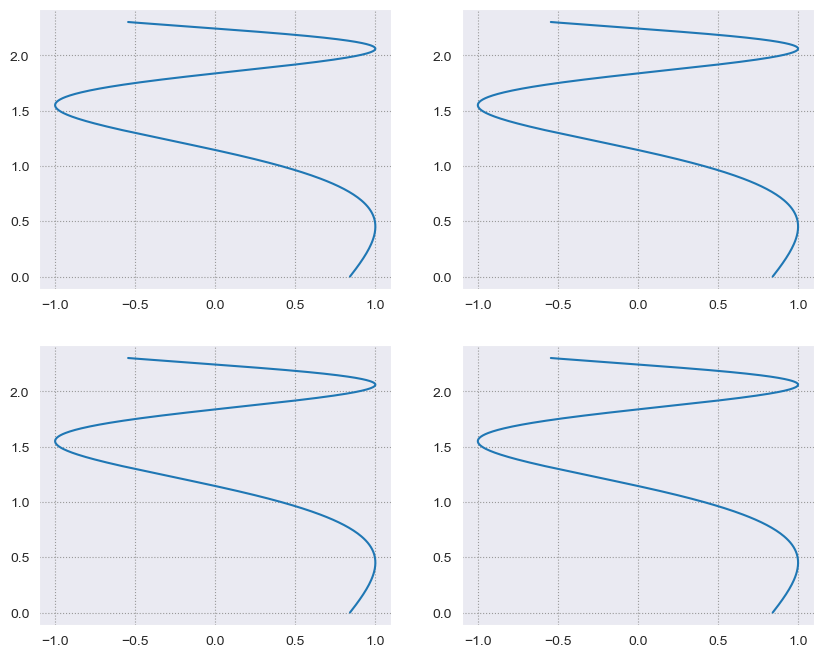

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
x = np.linspace(1, 10, 500)

for i in range(2):
    for j in range(2):
        axes[i][j].plot(np.sin(x), np.log(x))

In [7]:
df = pd.read_csv("data.csv")

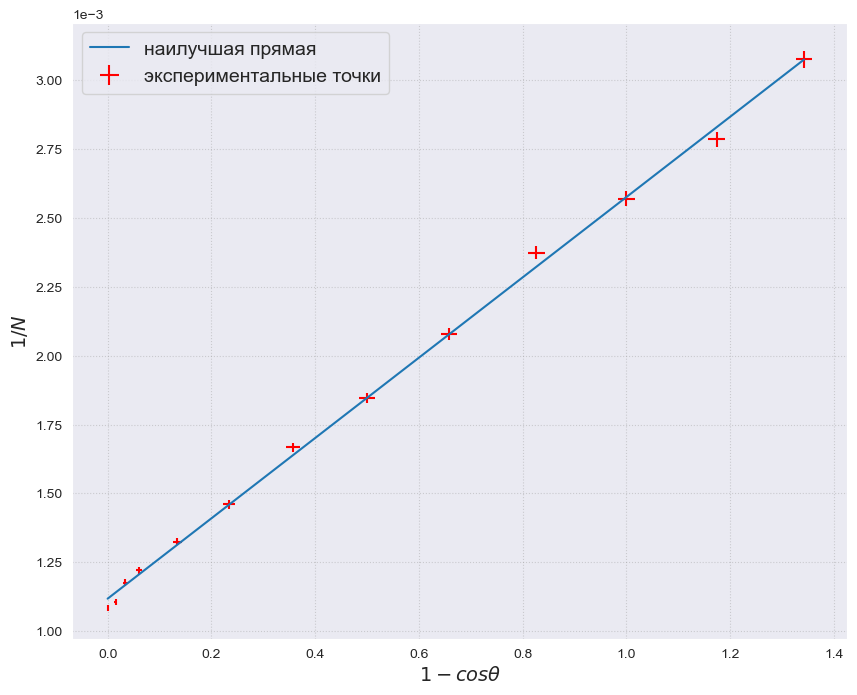

In [8]:
plt.figure(figsize=(10, 8))
# plt.scatter(
#     df["1_minus_cos"], df["1_over_N"]
# )

plt.ticklabel_format(axis="y", scilimits=(-4, -3))
# plt.ticklabel_format(axis="x", scilimits=(-1, -1))

plt.grid(alpha=0.4)

plt.errorbar(
    x=df["1_minus_cos"],
    y=df["1_over_N"],
    xerr=df["sigma_1_minus_cos"],
    yerr=df["sigma_1_over_N"],
    ls="none",
    color="red",
    label="экспериментальные точки"
    )

k, b = np.polyfit(df["1_minus_cos"], y=df["1_over_N"], deg=1)

plt.plot(df["1_minus_cos"], df["1_minus_cos"] * k + b, label="наилучшая прямая")

plt.xlabel(r'$1-cos\theta$', fontsize=14)
plt.ylabel(r'$1/N$', fontsize=14)

plt.legend(fontsize=14)

plt.savefig("pic1.png")

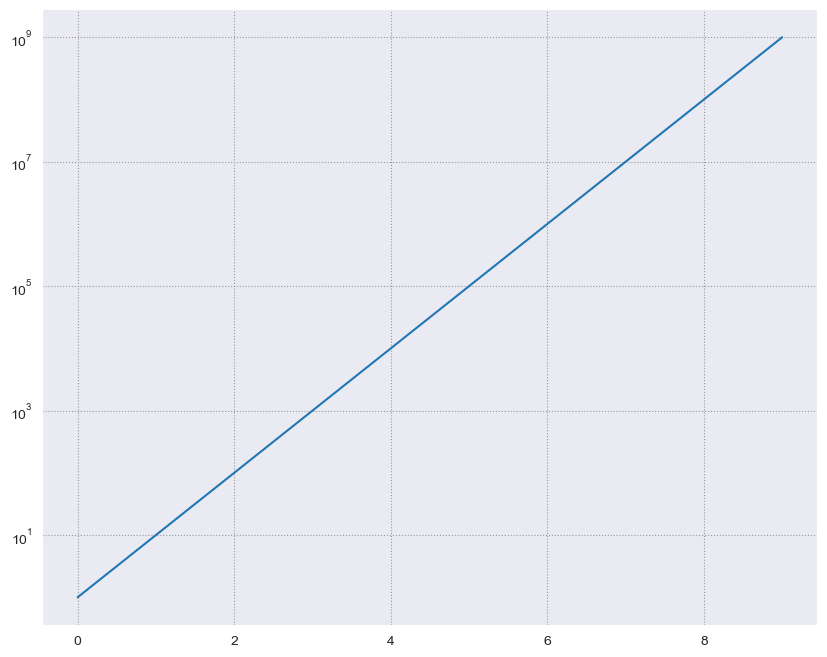

In [9]:
a = [pow(10, i) for i in range(10)]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

line, = ax.plot(a)

ax.set_yscale('log')

---
# №6

In [47]:
N = 1000

mu = 0
sigma = 1

def generate_matrix():
    a = np.random.normal(loc=mu, scale=sigma, size=[N, N])

    return  a + a.T

@njit
def calculate_hist_bins(mat, bins=35):
    eig_values = np.linalg.eigvals(mat)
    height, edges = np.histogram(eig_values, bins=bins)
    return height, edges

## Постройте гистограмму eigen значений:

<BarContainer object of 35 artists>

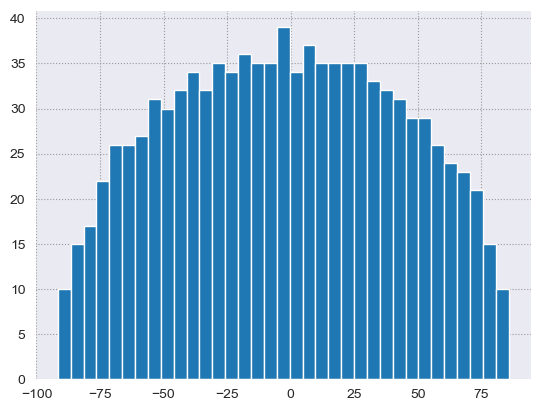

In [82]:
mat = generate_matrix()
height, edges = calculate_hist_bins(mat, bins=35)

plt.bar(edges[:-1], height, width=np.diff(edges))

## Отобразите разброс высоты с помощью креста:

In [83]:
M = 10
rows_of_heights = height.copy()     # Это матрица из высот для каждого бина в разных экспериментах

for i in range(M - 1):
    mat = generate_matrix()
    height, edges = calculate_hist_bins(mat, bins=35)
    rows_of_heights = np.vstack([rows_of_heights, height])

In [84]:
# min_height = rows_of_heights.min(axis=0)
# max_height = rows_of_heights.max(axis=0)
std_height = rows_of_heights.std(axis=0)     # стандартное отклонение для каждого бина
mean_height = rows_of_heights.mean(axis=0)

<ErrorbarContainer object of 3 artists>

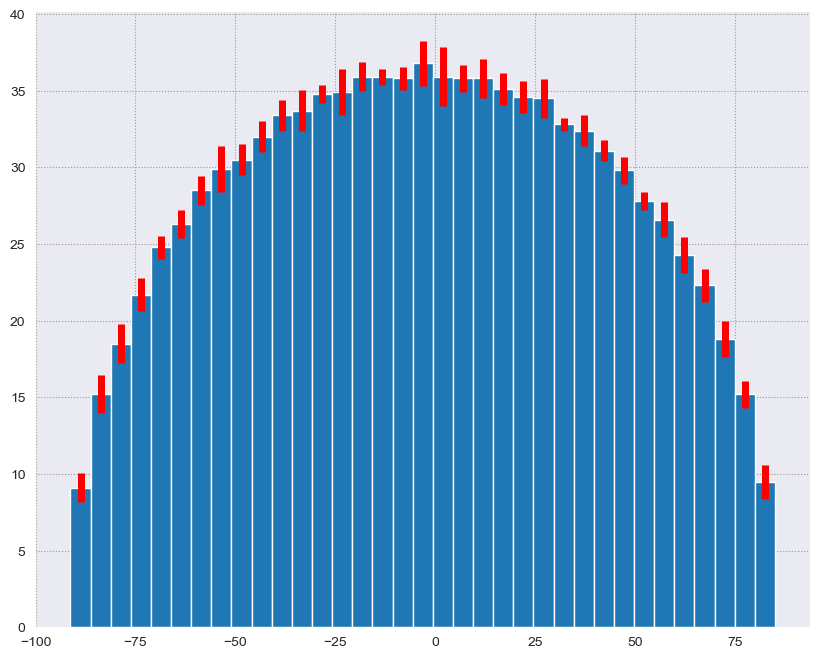

In [85]:
plt.figure(figsize=(10, 8))

plt.bar(edges[:-1], mean_height, width=np.diff(edges))
plt.errorbar(
    x=edges[:-1],
    y=mean_height,
    # xerr=
    yerr=std_height,
    ls="none",
    color="red",
    lw=np.diff(edges)[0]
)

## Диаграмма расстояний между eigen values: